# DECISION TREE ALGORITHM

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn import tree

In [57]:
df=pd.read_csv(r"C:\Users\santh\OneDrive\Desktop\studies\machine learning\mlproject\cars_ds_final.csv")

In [58]:
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,"Rs. 13,02,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,"Rs. 14,21,000",1498 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,"Rs. 14,31,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,"Rs. 12,01,000",1497 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [59]:
df=df.replace({'Displacement':'[a-z]','Ex-Showroom_Price':'[A-Za-z.,]'},'',regex=True) #to remove alpha chracter and symobols

In [60]:
df=df.dropna(subset = ['Displacement','Cylinders','Valves_Per_Cylinder'])

In [61]:
df

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,292667,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1302000,1498,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1272,1272,Honda,City,Zx Mt Diesel,1421000,1498,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1273,1273,Honda,City,Zx Cvt Petrol,1431000,1497,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1274,1274,Honda,City,V Cvt Petrol,1201000,1497,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [62]:
x= df.iloc[:, 5:8].values  
y= df.iloc[:, 4].values  

In [63]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [64]:
ss= StandardScaler()  
x_train= ss.fit_transform(x_train)    
x_test= ss.transform(x_test)    

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [66]:
dtr= DecisionTreeRegressor()

In [67]:
model=dtr.fit(x_train,y_train)

In [68]:
y_pred=model.predict(x_test)

In [69]:
score=(model.score(x_train,y_train)*100)

In [70]:
score

98.62539558414677

In [71]:
print("Mean Squared error : ", mean_squared_error(y_test, y_pred))
print("R - score (Training) : ", model.score(x_train, y_train))
print("R - score (Test) : ", model.score(x_test, y_test))

Mean Squared error :  22849999222746.96
R - score (Training) :  0.9862539558414677
R - score (Test) :  0.7671488150085194


# RANDOM FOREST

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf=RandomForestRegressor(random_state=0,n_jobs=-1)

In [74]:
model2=rf.fit(x_train,y_train)

In [75]:
y_pre=model2.predict(x_test)

In [76]:
scorerf=(model2.score(x_train,y_train)*100)

In [77]:
scorerf

97.89179111774622

In [93]:
print("Mean Squared error : ", mean_squared_error(y_test, y_pre))
print("R - score (Training) : ", model2.score(x_train, y_train))
print("R - score (Test) : ", model2.score(x_test, y_test))

Mean Squared error :  16691663914140.037
R - score (Training) :  0.9789179111774622
R - score (Test) :  0.8299048641534352


# XG BOOST

In [79]:
from xgboost import XGBRegressor

In [80]:
xgbr=XGBRegressor(verbosity=0)

In [81]:
mod=xgbr.fit(x_train,y_train)

In [82]:
y_prediction=mod.predict(x_test)

In [83]:
scorexgb=(xgbr.score(x_train,y_train)*100)

In [84]:
scorexgb

98.62489184091551

In [85]:
cv_score=cross_val_score(xgbr,x_train,y_train,cv=10)

In [86]:
cv_score

array([0.91843246, 0.9435573 , 0.77894387, 0.96629995, 0.9359846 ,
       0.88284213, 0.95795304, 0.92188666, 0.98351663, 0.88393715])

In [91]:
print("Mean Squared error : ", mean_squared_error(y_test, y_pre))
print("R - score (Training) : ", mod.score(x_train, y_train))
print("R - score (Test) : ", mod.score(x_test, y_test))

Mean Squared error :  16691663914140.037
R - score (Training) :  0.9862489184091551
R - score (Test) :  0.7746520970553918


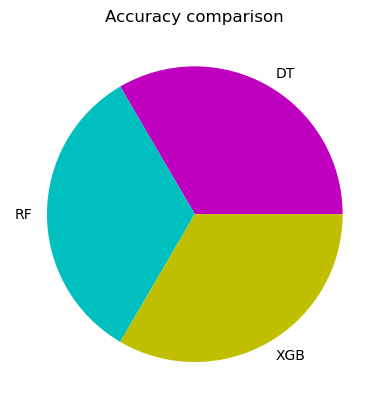

In [95]:
Accuracy = [score,scorerf,scorexgb]
color_code = ['m','c','y']
deviate_fraction = [0,0,0]
Algorithm = ['DT','RF','XGB']
plt.pie(Accuracy,colors=color_code,labels=Algorithm,explode=deviate_fraction)
plt.title('Accuracy comparison')
plt.show()

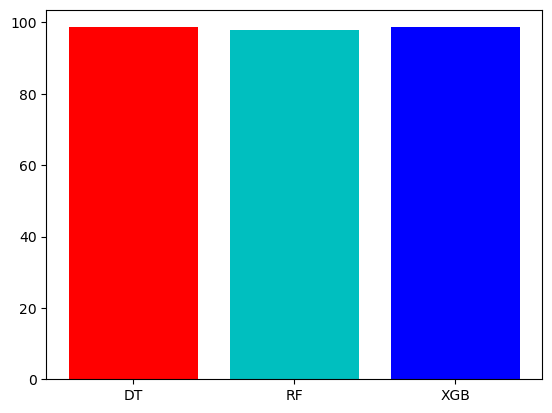

In [104]:
count = [score,scorerf,scorexgb]
color_code = ['r','c','b']
plt.bar(['DT','RF','XGB'],count,color = color_code)
plt.show()